
## 1. Pseudocode
![Pseudocode](hough_pseudo.jpg)


## 2. Actual Algorithm Code

In [24]:
import numpy as np
import math
import cv2
import random
import matplotlib.pyplot as plt
from skimage.transform import probabilistic_hough_line as hough


## 3. Data

In [2]:
def generateEasyLineImage(ySize, xSize):
    image = np.zeros((ySize, xSize))
    oX = xSize/2
    oY = ySize/2
    m = random.uniform(-3, 3)
    b = random.randint(-ySize/5, ySize/5)
    
    for xCenter in range(-xSize/2, xSize/2, 1):
        yCenter = m*xCenter + b
        xImage = xCenter + oX
        yImage =ySize - (yCenter + oY)
        if xImage > 0 and yImage > 0:
            try:
                image[int(yImage)][int(xImage)] = 1
            except:
                continue
    return image, m, b

def generateHardLineImage(ySize, xSize):
    image = np.zeros((ySize, xSize))
    oX = xSize/2
    oY = ySize/2
    m = random.uniform(-3, 3)
    b = random.randint(-ySize/5, ySize/5)
    
    for xCenter in range(-xSize/2, xSize/2, 3):
        yCenter = m*xCenter + b
        xImage = xCenter + oX
        yImage =ySize - (yCenter + oY)
        if xImage > 0 and yImage > 0:
            try:
                image[int(yImage)][int(xImage)] = 1
            except:
                continue
    return image, m, b

def introduceNoise(image, num):
    for i in range(num):
        y = random.randint(0, image.shape[0]-1)
        x = random.randint(0, image.shape[1]-1)
        image[y][x] = 1
    return image

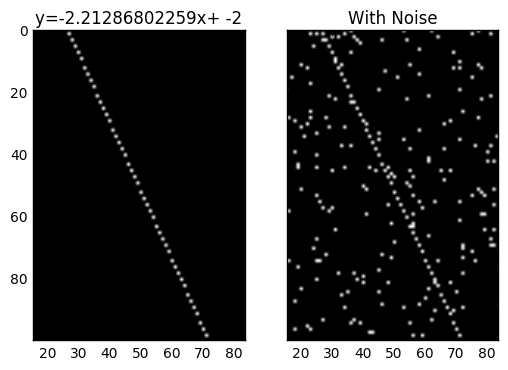

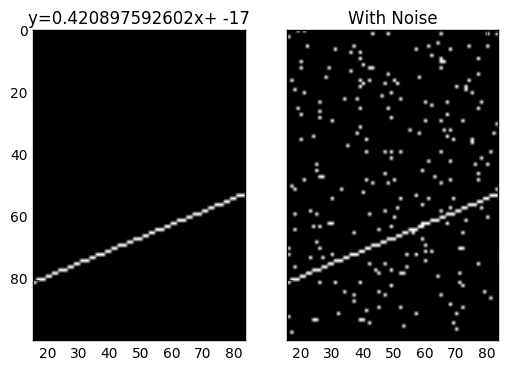

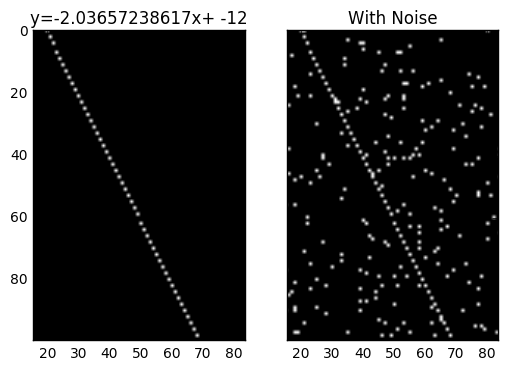

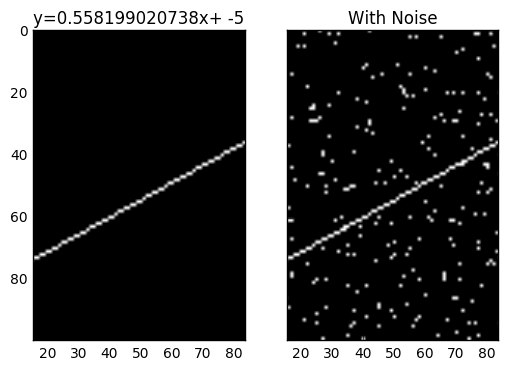

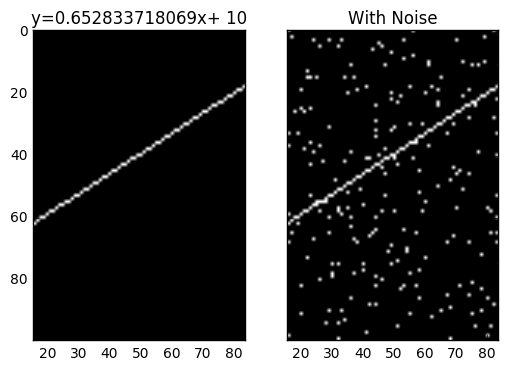

In [3]:
for test in range(5):
    f, (ax1, ax2) = plt.subplots(1, 2, sharex = 'col', sharey = 'row')
    i, m, b = generateEasyLineImage(100, 100)
    ax1.set_title('y=' + str(m) + 'x+ ' + str(b))
    ax1.imshow(i, cmap='gray')
    i2 = introduceNoise(i, 300)
    ax2.imshow(i2, cmap='gray')
    ax2.set_title('With Noise')
    plt.show()

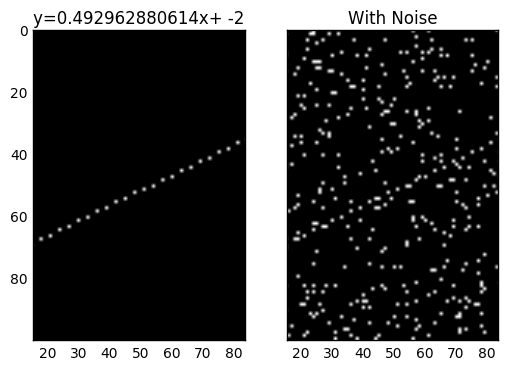

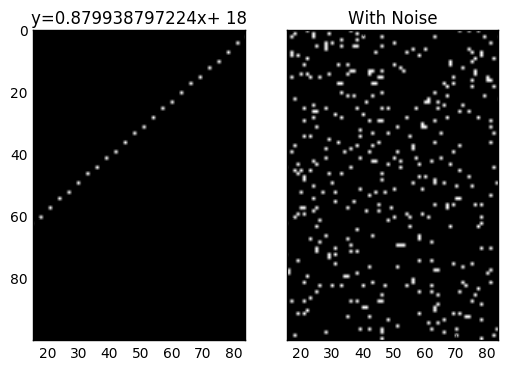

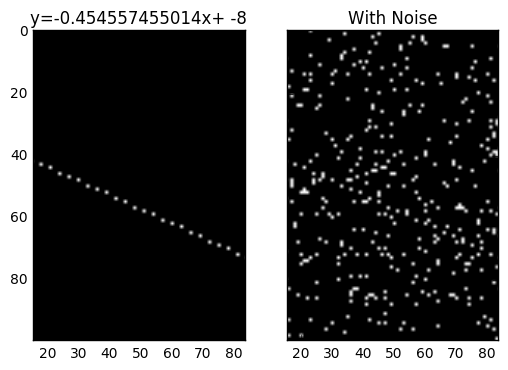

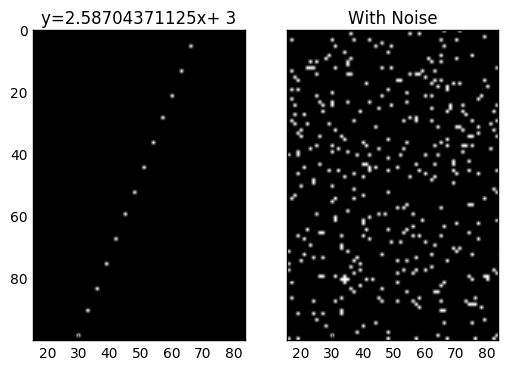

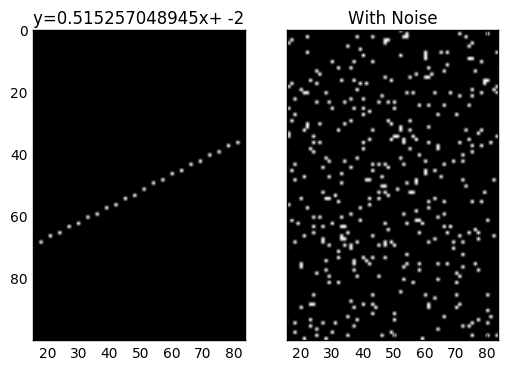

In [4]:
for test in range(5):
    f, (ax1, ax2) = plt.subplots(1, 2, sharex = 'col', sharey = 'row')
    i, m, b = generateHardLineImage(100, 100)
    ax1.set_title('y=' + str(m) + 'x+ ' + str(b))
    ax1.imshow(i, cmap='gray')
    i2 = introduceNoise(i, 500)
    ax2.imshow(i2, cmap='gray')
    ax2.set_title('With Noise')
    plt.show()

## 4. Simulation Testing

In [63]:
def easySimTest():
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = 'col', sharey = 'row')
    i, m, b = generateEasyLineImage(100, 100)
    ax1.set_title('y=' + str(m) + 'x+ ' + str(b))
    ax1.imshow(i, cmap='gray')
    i2 = introduceNoise(i, 500)
    ax2.imshow(i2, cmap='gray')
    ax2.set_title('With Noise')
    lines = hough(i2, threshold = 20)
    for line in lines:
        p0, p1 = line
        ax3.plot((p0[0], p0[1]), (p1[0], p1[1]))
    ax3.set_title('Output')
    plt.show()
    
def hardSimTest():
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = 'col', sharey = 'row')
    i, m, b = generateHardLineImage(100, 100)
    ax1.set_title('y=' + str(m) + 'x+ ' + str(b))
    ax1.imshow(i, cmap='gray')
    i2 = introduceNoise(i, 500)
    ax2.imshow(i2, cmap='gray')
    ax2.set_title('With Noise')
    lines = hough(i2, threshold = 5)
    for line in lines:
        p0, p1 = line
        ax3.plot((p0[0], p0[1]), (p1[0], p1[1]))
    ax3.set_title('Output')
    plt.show()

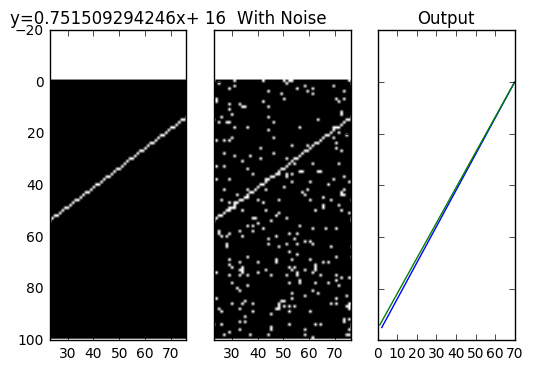

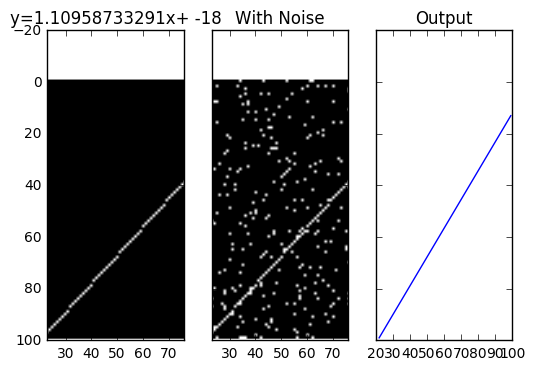

In [ ]:
for test in range(10):
    easySimTest()

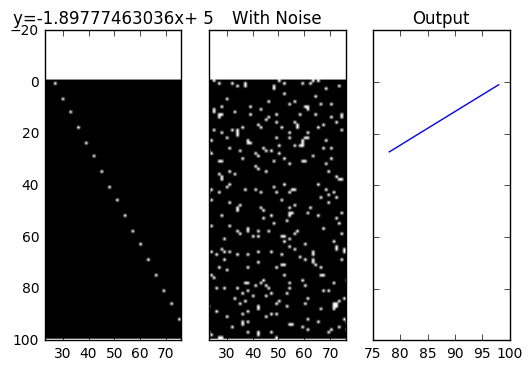

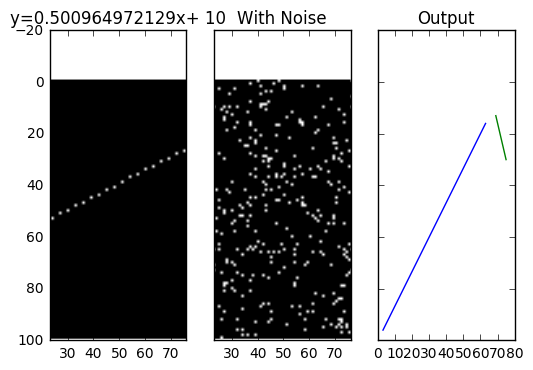

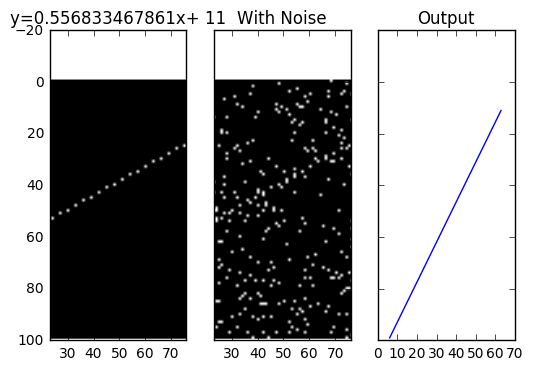

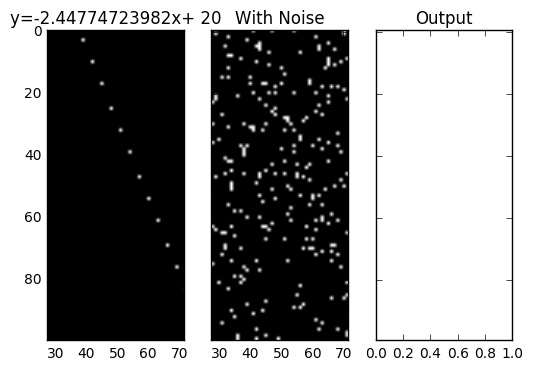

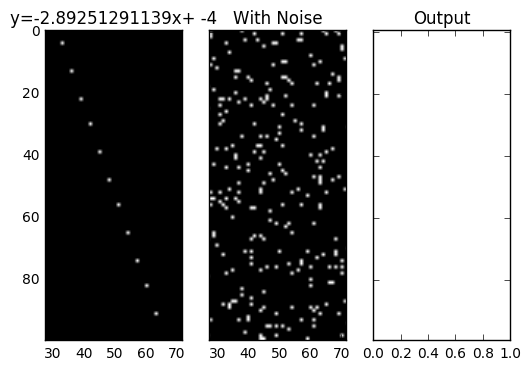

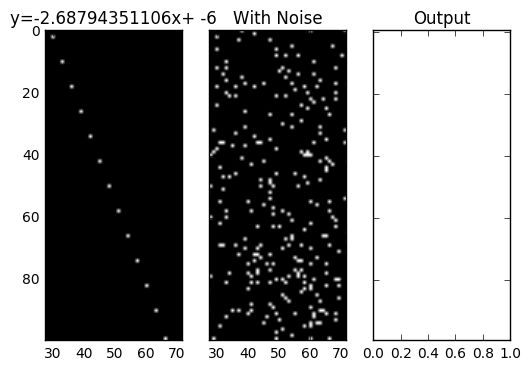

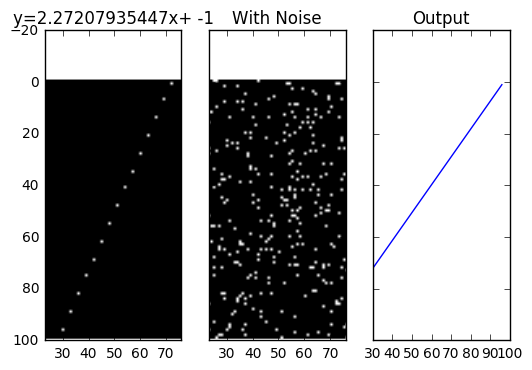

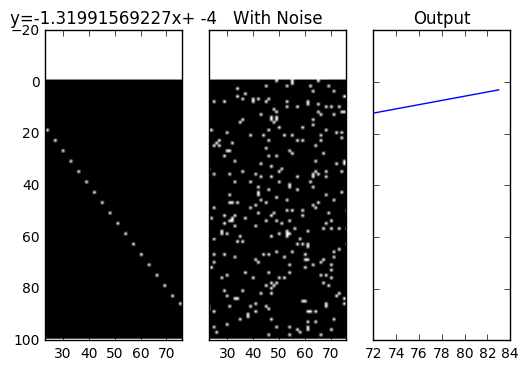

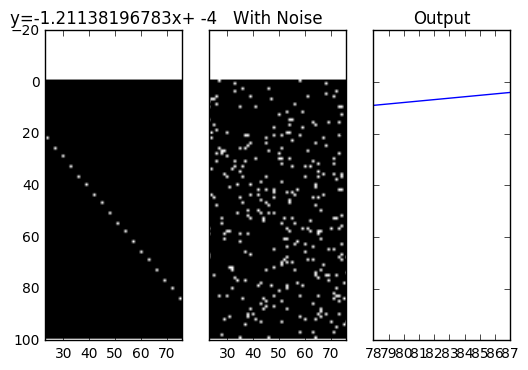

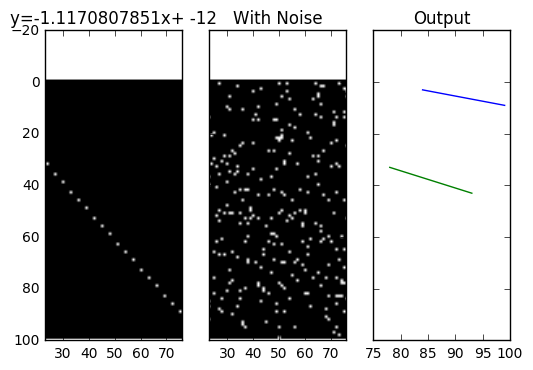

In [62]:
for test in range(10):
    hardSimTest()